In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file using pandas. 

In [284]:
df = pd.read_csv(r'C:\Users\sdplm\Downloads\googleplaystore.csv',
                 delimiter = ',',
                 skiprows = 0,
                 skipfooter = 0,
                 usecols = None,
                index_col = None)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Check for null values in the data. Get the number of null values for each column.



In [3]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Drop records with nulls in any of the columns. 

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 4.Variables seem to have incorrect type and inconsistent formatting. Need to fix them:

In [8]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 4.1.(1&2) df["Size"]

In [9]:
df['Size'].values

array(['19M', '14M', '8.7M', ..., '3.6M', 'Varies with device', '19M'],
      dtype=object)

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [11]:
df["Size"] = [float(i.split('M')[0]) if 'M' in i else float(0) for i in df["Size"]]

In [12]:
df["Size"].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   5.5,  17. ,  39. ,  31. ,
         4.2,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,  11. ,  24. ,
         0. ,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,   7.9,  56. ,
        57. ,  35. ,  54. ,   3.6,   5.7,   8.6,   2.4,  27. ,   2.7,
         2.5,   7. ,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,
         5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,
        30. ,   2.6,   7.1,  22. ,   6.4,   3.2,   8.2,   4.9,   9.5,
         5. ,   5.9,  13. ,  73. ,   6.8,   3.5,   4. ,   2.3,   2.1,
        42. ,   9.1,  55. ,   7.3,   6.5,   1.5,   7.5,  51. ,  41. ,
        48. ,   8.5,  46. ,   8.3,   4.3,   4.7,   3.3,  40. ,   7.8,
         8.8,   6.6,   5.1,  61. ,  66. ,   8.4,   3.7,  44. ,   1.6,
         6.2,  53. ,   1.4,   3. ,   7.2,   5.8,   3.8,   9.6,  45. ,
        63. ,  49. ,  77. ,   4.4,  70. ,   9.3,   8.1,  36. ,   6.9,
         7.4,  84. ,

In [13]:
df["Size"] = df["Size"] * 1000
df.head(60)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# 4.2 df['Reviews']

In [14]:
df['Reviews'].dtype

dtype('O')

In [15]:
df['Reviews'] = df['Reviews'].astype(np.int64)
df['Reviews'].dtype

dtype('int64')

In [16]:
df['Reviews'].values

array([   159,    967,  87510, ...,      4,    114, 398307], dtype=int64)

### 4.3.(1&2)::- cleaning and converting df['Installs'] column.

In [17]:
df['Installs'].values

array(['10,000+', '500,000+', '5,000,000+', ..., '100+', '1,000+',
       '10,000,000+'], dtype=object)

In [18]:
df['Installs'].dtype

dtype('O')

In [19]:
df['Installs'] = df['Installs'].str.replace('+',',')
df['Installs'].values

array(['10,000,', '500,000,', '5,000,000,', ..., '100,', '1,000,',
       '10,000,000,'], dtype=object)

In [20]:
df['Installs'] = df['Installs'].str.replace(',','',regex = True).astype(np.int64)
df['Installs'].values

array([   10000,   500000,  5000000, ...,      100,     1000, 10000000],
      dtype=int64)

# 4.4 df['Price']

In [21]:
df.iloc[222]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                   11442
Size                                                     6800.0
Installs                                                 100000
Type                                                       Paid
Price                                                     $4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Name: 234, dtype: object

In [22]:
df['Price'] = df['Price'].str.replace('$','')
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9360, dtype: object

In [23]:
df['Price'] = df['Price'].astype(np.float64)
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [24]:
df.iloc[222]

App               TurboScan: scan documents and receipts in PDF
Category                                               BUSINESS
Rating                                                      4.7
Reviews                                                   11442
Size                                                     6800.0
Installs                                                 100000
Type                                                       Paid
Price                                                      4.99
Content Rating                                         Everyone
Genres                                                 Business
Last Updated                                     March 25, 2018
Current Ver                                               1.5.2
Android Ver                                          4.0 and up
Name: 234, dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


# 5. Sanity checks:

# df['Rating']

In [26]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [27]:
 df[(df['Rating'] > 5)].index   # no such value to drop 

Index([], dtype='int64')

In [28]:
df[(df['Rating'] < 1)].index    # no such value to drop

Index([], dtype='int64')

In [29]:
df = df.drop(df[(df['Rating']>5) & (df['Rating'] < 1)].index)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5.2 df['Reviews']

In [30]:
df[df['Reviews'] > df['Installs']].index

Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [31]:
df.drop(df[df['Reviews']> df['Installs']].index, inplace = True)

In [32]:
df[df['Reviews'] > df['Installs']].index

Index([], dtype='int64')

# 5.3 df['Price']

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df[(df['Price'] != 0) & (df['Type'] == 'Free')]  # no such row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Performing univariate analysis: 



### price

C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


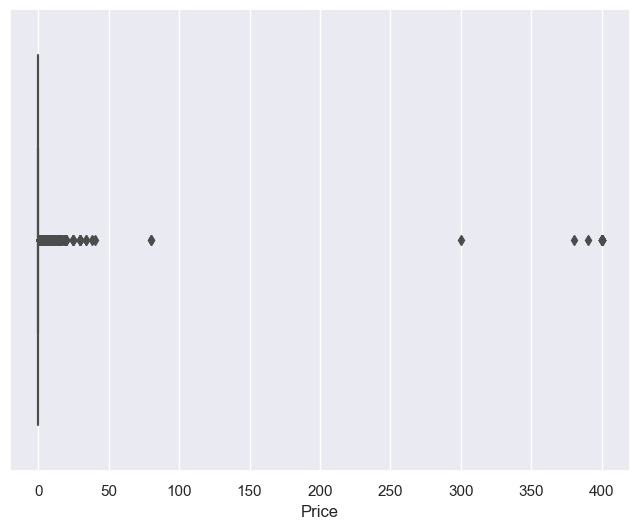

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize =(8,6) )
sns.boxplot(x=df['Price'])
plt.show()

### reviews

C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


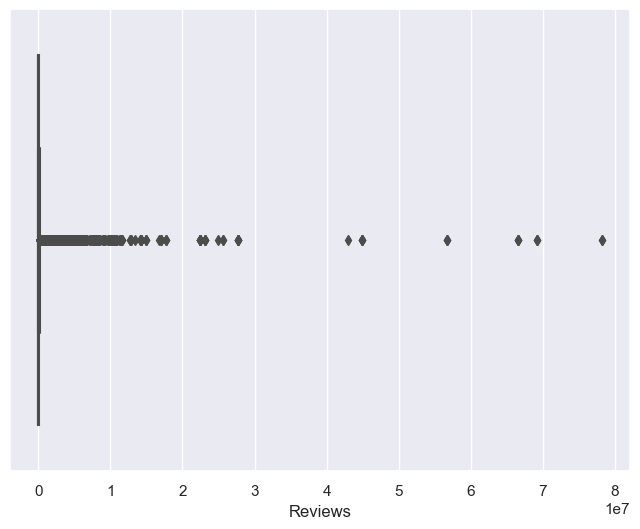

In [36]:
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Reviews'])
plt.show()

### rating

[]

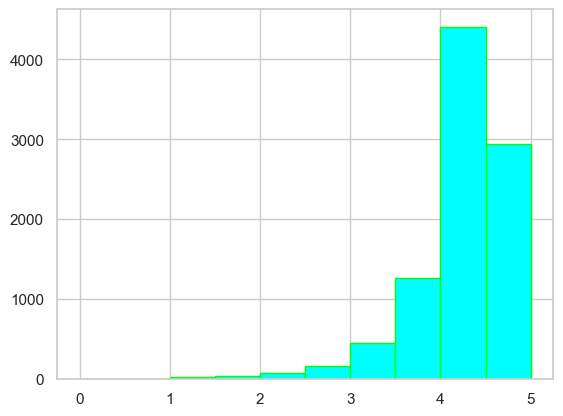

In [37]:
sns.set_style('whitegrid')
plt.hist(df['Rating'], color = 'aqua', range=(0,5), edgecolor = 'lime')
plt.plot()

### size

[]

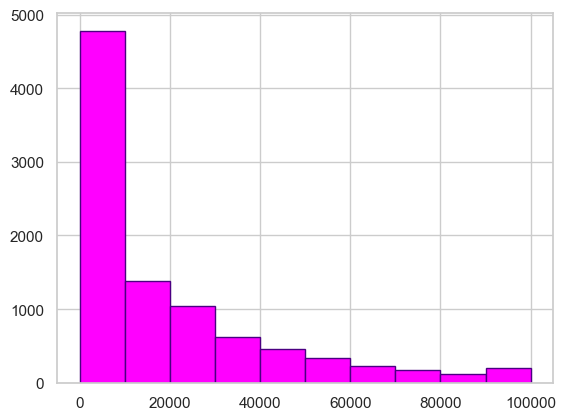

In [38]:
sns.set_style('whitegrid')
plt.hist(df['Size'], color = 'magenta',edgecolor = 'indigo')
plt.plot()

# 6. Outlier treatment:

### 6.1price

In [39]:
df['Price'].shape

(9353,)

In [40]:
df[df['Price'] >= 200].index

Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362, 5364,
       5366, 5369, 5373],
      dtype='int64')

In [41]:
df.drop(df[df['Price'] >= 200].index,inplace = True)

In [42]:
df['Price'].shape  # 15 rows have been dropped

(9338,)

### 6.2 Reviews:

In [43]:
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [44]:
df['Reviews'].shape

(9338,)

In [45]:
df[df['Reviews'] > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad ðŸ“– Free Books,BOOKS_AND_REFERENCE,4.6,2914724,0.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger â€“ Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,0.0,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [46]:
df.drop(df[df['Reviews'] > 2000000].index, inplace = True)

In [47]:
df['Reviews'].shape

(8885,)

### 6.3 Installs

In [48]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,        100,        500,         10,
                5,         50,  500000000], dtype=int64)

In [49]:
df['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [50]:
df.drop(df[df['Installs']> 10000000].index,inplace = True)

In [51]:
df.shape

(8496, 13)

# 7 . 1 

Text(0.5, 1.0, 'RATING VS PRICE')

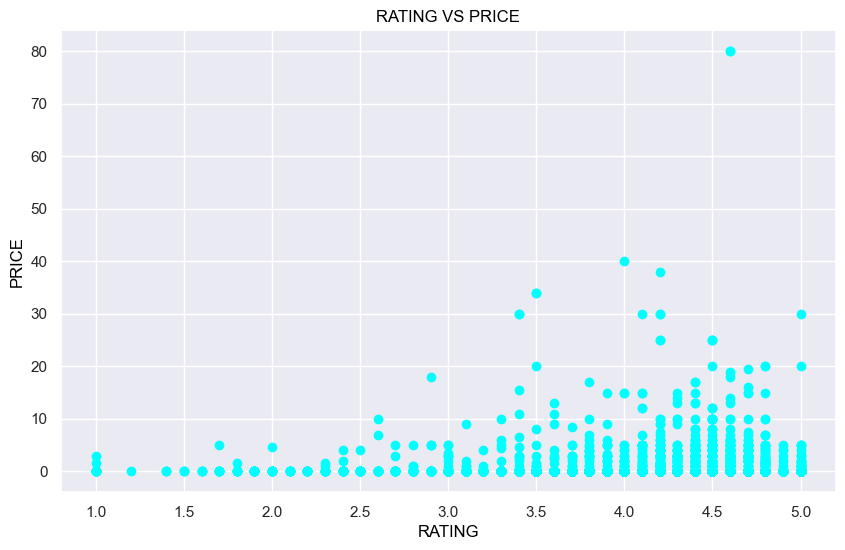

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
plt.scatter(y= df['Price'],
           x= df['Rating'],
           color = 'cyan')
plt.xlabel('RATING',color = 'black')
plt.ylabel('PRICE',color = 'black')
plt.title('RATING VS PRICE',color = 'black')

### conclusion : RATING IS INCREASES WITH PRICES. 

# 7.2

Text(0.5, 1.0, 'RATING VS size')

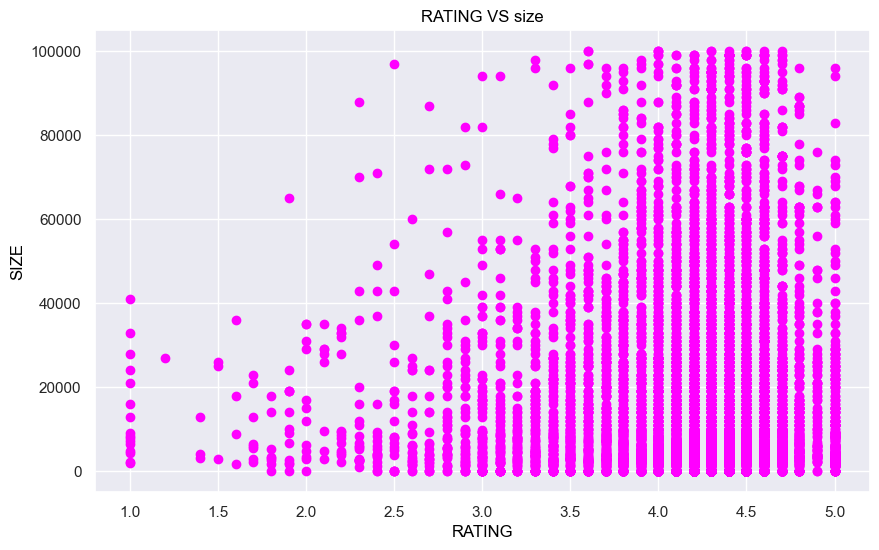

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
plt.scatter(y= df['Size'],
           x= df['Rating'],
           color = 'magenta')
plt.xlabel('RATING',color = 'black')
plt.ylabel('SIZE',color = 'black')
plt.title('RATING VS size',color = 'black')

### conclusion: heavier apps  are rated better

# 7.3

Text(0.5, 1.0, 'RATING VS REVIEWS')

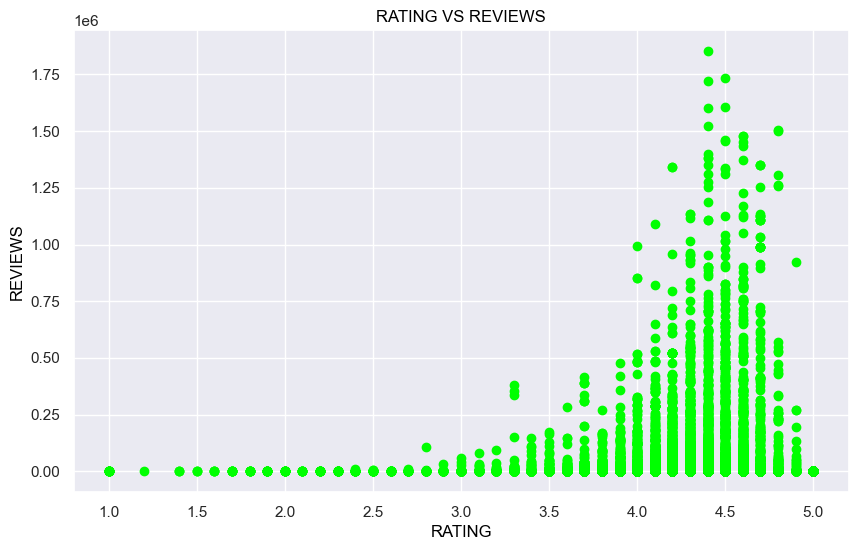

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
plt.scatter(y= df['Reviews'],
           x= df['Rating'],
           color = 'LIME')
plt.xlabel('RATING',color = 'black')
plt.ylabel('REVIEWS',color = 'black')
plt.title('RATING VS REVIEWS',color = 'black')

### conclusion: more review mean a better rating always

# 7. 4

C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'RATING VS C RATING')

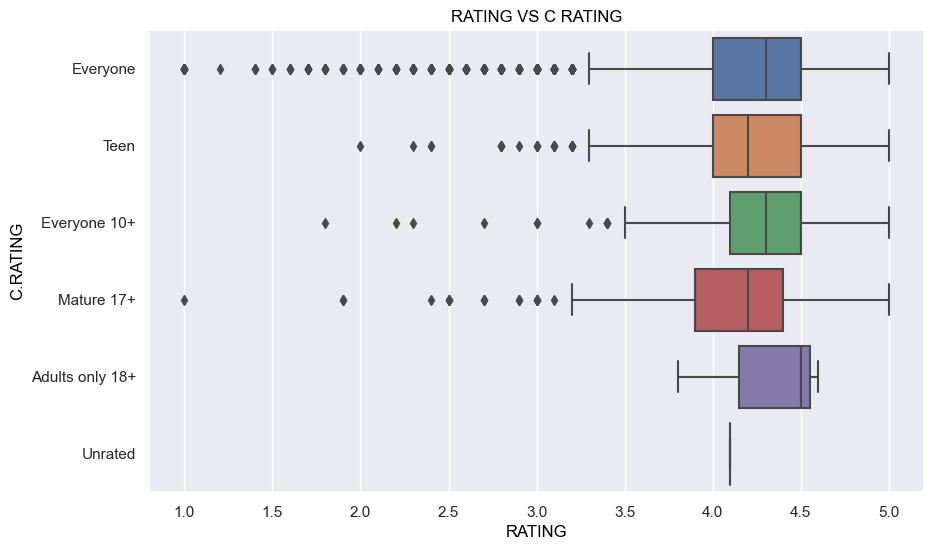

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
sns.boxplot(y= 'Content Rating',
           x= 'Rating',
           data = df)

plt.xlabel('RATING',color = 'black')
plt.ylabel('C.RATING',color = 'black')
plt.title('RATING VS C RATING',color = 'black')

### conclusion :ADULTS ONLY 18+ APPS are liked better

# 7.5

C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sdplm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'RATING VS CATEGORY')

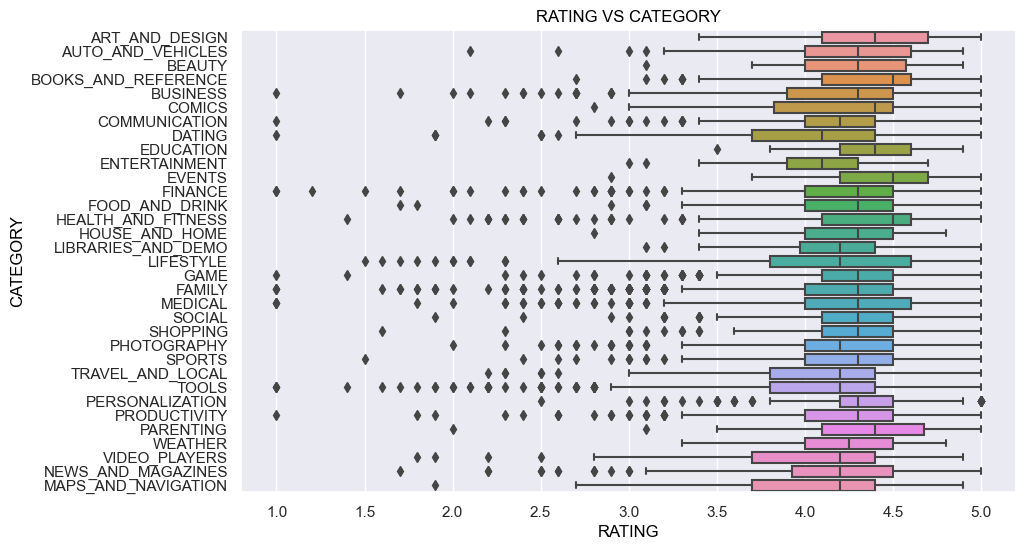

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
sns.boxplot(y= 'Category',
           x= 'Rating',
           data = df)
plt.xlabel('RATING',color = 'black')
plt.ylabel('CATEGORY',color = 'black')
plt.title('RATING VS CATEGORY',color = 'black')

### conclusion: EVENTS has the best ratings

# 8. PREPROCESSING

In [169]:
inp1 = df.copy()

In [170]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


# 8.1

In [171]:
inp1[['Rating','Reviews','Size','Installs','Price']].skew()

Rating      -1.749753
Reviews      4.576494
Size         1.655917
Installs     1.543697
Price       16.264811
dtype: float64

In [172]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [173]:
inp1['Reviews']

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8496, dtype: float64

In [174]:
 reviewskew.skew()

-0.20039949659264134

In [175]:
inp1.shape

(8496, 13)

In [176]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 

0           10000
1          500000
2         5000000
4          100000
5           50000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8496, dtype: int64

In [177]:
installsskew.skew()

-0.5097286542754812

In [178]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


# 8.2

In [179]:
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [180]:
inp1.drop('Last Updated',axis = 1,inplace = True)

In [181]:
inp1.drop('Current Ver',axis = 1,inplace = True)

In [182]:
inp1.drop('Android Ver',axis = 1,inplace = True)

In [183]:
inp1.drop('App',axis = 1,inplace = True)

In [184]:
inp1.drop('Type',axis = 1,inplace = True)

In [185]:
inp1

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,500,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,5000,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,100,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,0.0,1000,0.0,Mature 17+,Books & Reference


# 8.3 

In [186]:
inp2 = inp1

In [187]:
inp2.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

# dummies CATEGORY

In [188]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [189]:
inp2['Category'] = pd.Categorical(inp2['Category'])


In [190]:
x = inp2[['Category']]
x

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
4,ART_AND_DESIGN
5,ART_AND_DESIGN
...,...
10834,FAMILY
10836,FAMILY
10837,FAMILY
10839,BOOKS_AND_REFERENCE


In [191]:
del inp2['Category']

In [192]:
inp2

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
4,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity
5,4.4,5.123964,5600.0,50000,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,500,0.0,Everyone,Education
10836,4.5,3.663562,53000.0,5000,0.0,Everyone,Education
10837,5.0,1.609438,3600.0,100,0.0,Everyone,Education
10839,4.5,4.744932,0.0,1000,0.0,Mature 17+,Books & Reference


In [193]:
dummies = pd.get_dummies(x, prefix = 'Category')

In [194]:
dummies

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [195]:
dummies = dummies.astype(int)

In [196]:
dummies

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
inp2 = pd.concat([inp2,dummies],axis = 1)
inp2.shape

(8496, 40)

In [198]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# dummies "Genres"

In [199]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [200]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [201]:
inp2.Genres.unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [202]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
dummies = dummies.astype(int)
inp2 = pd.concat([inp2,dummies], axis=1)

In [203]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,10000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
inp2.shape

(8496, 91)

# dummies content rating

In [205]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [206]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
dummies = dummies.astype(int)
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,50000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [207]:
inp2.shape

(8496, 96)

# Multiple linear regression

# 9

In [214]:
m = inp2.copy()


In [216]:
m.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,50000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [217]:
m.shape

(8496, 96)

In [218]:
x = m.drop('Rating',axis = 1)
x

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000.0,10000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,14000.0,500000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379520,8700.0,5000000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6.875232,2800.0,100000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5.123964,5600.0,50000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2.079442,2600.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,3.663562,53000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,1.609438,3600.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10839,4.744932,0.0,1000,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [219]:
y = m[['Rating']]
y

,Rating
0,4.1
1,3.9
2,4.7
4,4.3
5,4.4
...,...
10834,4.0
10836,4.5
10837,5.0
10839,4.5


# 10

In [220]:
from sklearn.model_selection import train_test_split as tts

In [253]:
x_train,x_test,y_train,y_test = tts(x,y, random_state = 50,test_size = 0.3)

In [254]:
x_train.shape

(5947, 95)

In [255]:
x_test.shape

(2549, 95)

In [256]:
y_train.shape

(5947, 1)

In [257]:
y_test.shape

(2549, 1)

# 11

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
lr = LinearRegression()

In [260]:
lr

LinearRegression()

In [261]:
lr.fit(x_train,y_train)

LinearRegression()

In [262]:
print('c:',lr.intercept_)
print('m:',lr.coef_)

c: [3.98584766]
m: [[ 2.58556526e-02 -2.83057889e-07  2.09800405e-09  7.71974798e-03
   5.81483078e-02  3.64089623e-02  1.03868234e-01  9.71365401e-02
   2.84181248e-03  5.92934116e-01 -3.47015951e-02 -7.60406845e-02
  -1.92936790e-02 -8.72930046e-02  1.33524204e-01  1.03729201e-03
   5.48574061e-03 -2.12128639e-02  1.43051059e-01  6.42389737e-02
  -3.06567442e-03  1.90086845e-02 -3.48041909e-01 -7.00274529e-02
   4.60803607e-02 -1.41302861e-02 -2.30156507e-01  9.15955450e-02
  -3.53898258e-02  2.35929317e-03  2.08889236e-02  3.82334254e-02
  -6.14771183e-02 -7.27457697e-02 -1.22489511e-01 -2.62555600e-01
   1.78000667e-03 -1.23780522e-01 -1.69896516e-01 -8.31304794e-02
   1.87927748e-01  3.64089623e-02  1.03868234e-01  2.51707101e-02
   9.71365401e-02  2.84181248e-03 -3.36530866e-01 -3.80539204e-02
  -1.58665205e-01 -6.06081166e-02 -6.46499898e-01 -3.47015951e-02
  -7.60406845e-02  1.71072824e-01  2.28175435e-01  2.69005705e-01
  -3.87078263e-01  5.86445269e-02 -6.89381954e-02 -2.3582

In [263]:
y_pred_train = lr.predict(x_train)

In [264]:
y_pred_train

array([[4.25304373],
       [4.4515129 ],
       [4.45943334],
       ...,
       [3.84041629],
       [4.14878828],
       [4.1669886 ]])

In [265]:
prediction = pd.DataFrame()
prediction['actual']= y_train
prediction['predicted'] = y_pred_train
prediction

,actual,predicted
10597,4.9,4.253044
785,4.6,4.451513
1373,4.4,4.459433
5543,4.5,4.257013
10302,4.2,3.996194
...,...,...
10484,4.7,4.133763
7875,3.9,4.148724
10591,1.0,3.840416
7923,3.8,4.148788


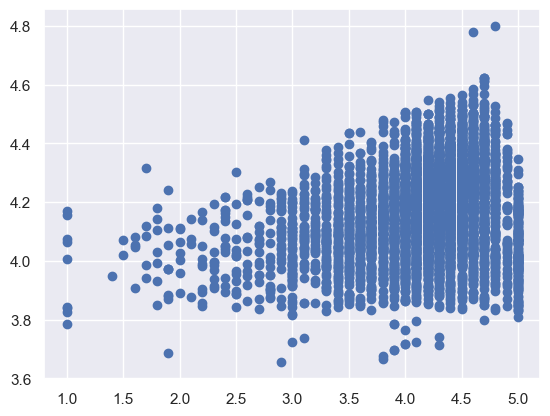

In [283]:
plt.scatter(y_train,y_pred_train)
plt.show()

In [277]:
from sklearn import metrics

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),3))

print('R^2:', round(metrics.r2_score(y_train,y_pred_train),3))

RMSE: 0.504
R^2: 0.077


# 12

In [268]:
y_pred_test = lr.predict(x_test)

In [269]:
y_pred_test

array([[3.87236711],
       [4.5160812 ],
       [4.05122651],
       ...,
       [4.38821648],
       [4.32522076],
       [3.92008274]])

In [270]:
prediction2 = pd.DataFrame()
prediction2['actual'] = y_test
prediction2['predicted']= y_pred_test
prediction2

,actual,predicted
9207,4.0,3.872367
8925,4.3,4.516081
4119,4.3,4.051227
2590,4.1,4.383525
6630,4.5,4.437608
...,...,...
6087,4.0,4.301095
5665,3.6,4.380372
811,4.3,4.388216
2082,3.9,4.325221


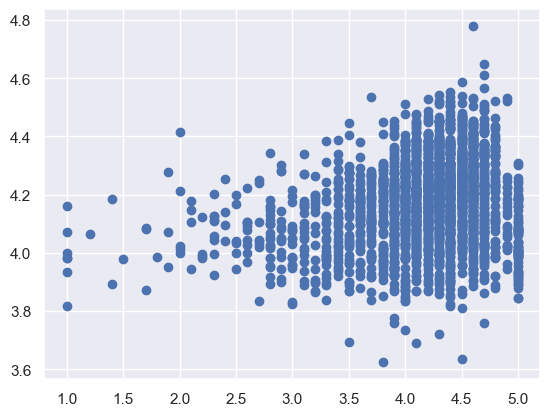

In [271]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [279]:
from sklearn import metrics
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)),3))
print('R^2:',round(metrics.r2_score(y_test,y_pred_test),3))

RMSE: 0.535
R^2: 0.056


#                                             END